In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('../exercicio3/medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
height_in_meters = df['height'] / 100
height_square = height_in_meters ** 2
bmi = df['weight'] / height_square
df['overweight'] = np.where(bmi > 25, 1, 0)
df['overweight'].head()

0    0
1    1
2    0
3    1
4    0
Name: overweight, dtype: int64

In [83]:
# Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


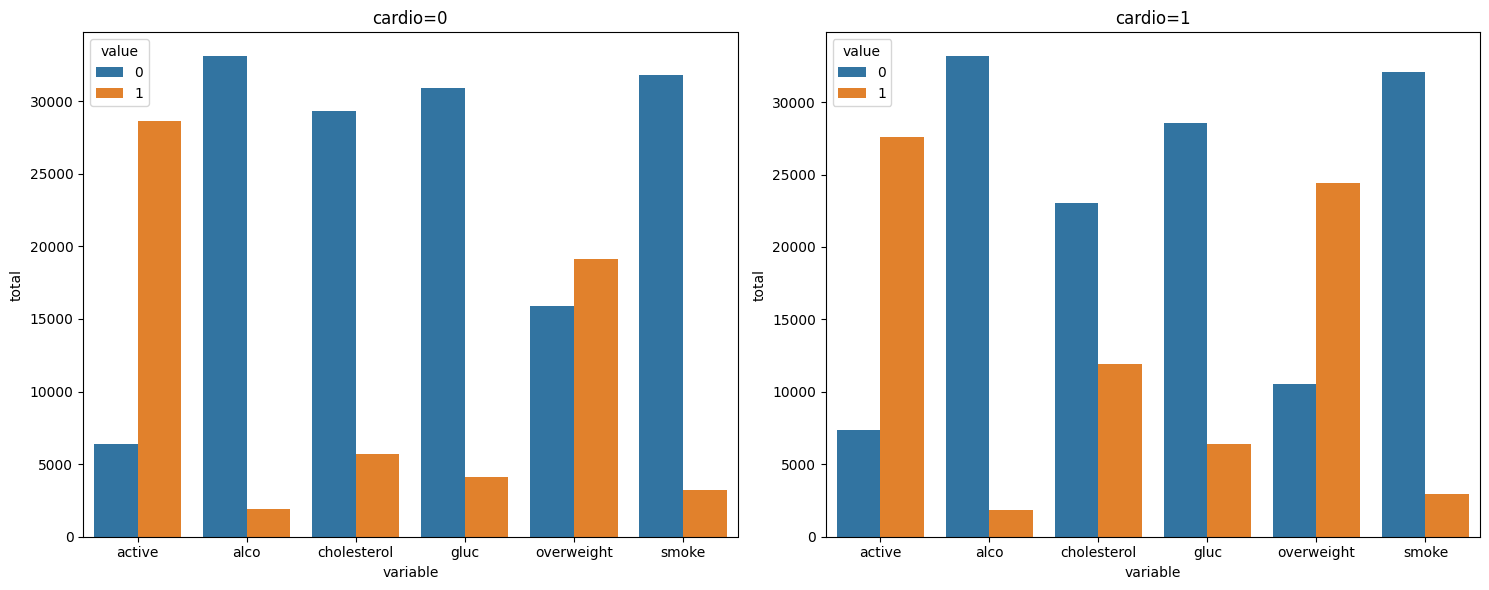

In [84]:
# Draw the Categorical Plot in the draw_cat_plot function.
def draw_cat_plot():
    # 5. Derreter os dados para um formato longo
    df_cat = pd.melt(df[['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight']],
                    id_vars=['cardio'], var_name='variable', value_name='value')

    # 6. Agrupar os dados e contar as ocorrências
    df_cat_grouped = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    # 7. Filtrar os dados para cardio=0 e cardio=1
    df_cat_cardio_0 = df_cat_grouped[df_cat_grouped['cardio'] == 0]
    df_cat_cardio_1 = df_cat_grouped[df_cat_grouped['cardio'] == 1]

    # 8. Criar os subgráficos (lado a lado)
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 linha, 2 colunas

    # Gráfico para cardio=0 (no primeiro subplot)
    sns.barplot(x='variable', y='total', hue='value', data=df_cat_cardio_0, ax=axes[0])
    axes[0].set_title('cardio=0')
    axes[0].set_ylabel('total')

    # Gráfico para cardio=1 (no segundo subplot)
    sns.barplot(x='variable', y='total', hue='value', data=df_cat_cardio_1, ax=axes[1])
    axes[1].set_title('cardio=1')
    axes[1].set_ylabel('total')

    # Ajustar layout para evitar sobreposição
    plt.tight_layout()

    # 9. Salvar a figura gerada
    fig.savefig('catplot.png')

    plt.close(fig)

    return fig

draw_cat_plot()